In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

In [4]:
path = "../data/Food_Supply_Quantity_kg_Data.csv"
df = pd.read_csv(path)

In [5]:
df.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.053472,0.000938,0.004929,0.047605,38042000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,0.043597,0.001190,0.032820,0.009587,2858000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.023393,0.001629,0.015475,0.006289,43406000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.000290,0.000013,0.000076,0.000200,31427000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.026804,0.003093,0.020619,0.003093,97000.0,%


In [6]:
for col in df.columns: 
    print(col) 

Country
Alcoholic Beverages
Animal fats
Animal Products
Aquatic Products, Other
Cereals - Excluding Beer
Eggs
Fish, Seafood
Fruits - Excluding Wine
Meat
Milk - Excluding Butter
Miscellaneous
Offals
Oilcrops
Pulses
Spices
Starchy Roots
Stimulants
Sugar & Sweeteners
Sugar Crops
Treenuts
Vegetable Oils
Vegetables
Vegetal Products
Obesity
Undernourished
Confirmed
Deaths
Recovered
Active
Population
Unit (all except Population)


In [26]:
df['Rec_Rate'] = df[['Confirmed', 'Active', 'Recovered']].apply(lambda x: (x['Recovered']/(x['Confirmed']-x['Active']))*100, axis=1)
df = df.sort_values(by=['Rec_Rate'], ascending=False)

In [27]:
df['Total Confirmed'] = df[['Confirmed', 'Population']].apply(lambda row: (row['Confirmed']/100)*row['Population'], axis=1)


In [28]:
#top ranked countries with highest recovery rate with cases more than  
df['Country'].loc[df['Total Confirmed']>= 100000].head(10)

133                  Saudi Arabia
29                          Chile
126            Russian Federation
154                        Turkey
56                        Germany
68                          India
70     Iran (Islamic Republic of)
120                          Peru
20                         Brazil
100                        Mexico
Name: Country, dtype: object

In [29]:
df[['Country', 'Rec_Rate']].loc[df['Total Confirmed']>= 100000].head(4)

,Country,Rec_Rate
133,Saudi Arabia,99.031675
29,Chile,98.508931
126,Russian Federation,97.479354
154,Turkey,96.711084


In [38]:
df_filtered_top = df[df["Country"].isin(["Saudi Arabia", "Chile", "Russian Federation", "Turkey"])]
df_filtered_top = df_filtered_top.sort_values(by=['Rec_Rate'], ascending=False)
df_filtered_top

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),Rec_Rate,Total Confirmed
133,Saudi Arabia,0.0000,0.3917,12.9962,0.0000,16.3284,0.6003,1.0369,7.0413,4.9529,...,35.0,7.1,0.297837,0.002081,0.212803,0.082953,34218000.0,%,99.031675,101914.0
29,Chile,4.9690,0.1782,15.0394,0.0155,10.8579,0.7757,0.8711,3.9109,6.1492,...,28.8,2.7,0.702099,0.008568,0.566023,0.127508,19107000.0,%,98.508931,134150.0
126,Russian Federation,3.7425,0.2486,16.1525,0.0023,8.2803,0.9029,1.1312,3.1620,4.3180,...,25.7,<2.5,0.318319,0.003988,0.154209,0.160123,146731000.0,%,97.479354,467073.0
154,Turkey,0.6474,0.1459,12.3156,0.0000,9.7080,0.3956,0.2582,6.8321,2.0694,...,32.2,<2.5,0.205953,0.005680,0.167019,0.033255,82607000.0,%,96.711084,170132.0


In [40]:
df_filtered_top_food = df_filtered_top.iloc[:,1:24]
df_filtered_top_food.sum(axis = 1, skipna = True) 

133    100.0001
29     100.0001
126     99.9999
154    100.0001
dtype: float64

In [55]:
df_filtered_top['Max_Value'] = df_filtered_top_food.max(axis=1)

df_filtered_top['Max_Value']

133    37.0038
29     34.9584
126    33.8472
154    37.6836
Name: Max_Value, dtype: float64

In [44]:
df_filtered_top['Max_Value_Column'] = df_filtered_top_food.idxmax(axis=1)
 
df_filtered_top['Max_Value_Column']

133    Vegetal Products
29     Vegetal Products
126    Vegetal Products
154    Vegetal Products
Name: Max_Value_Column, dtype: object

In [46]:
df_filtered_top['Min_Value'] = df_filtered_top_food.min(axis=1)

df_filtered_top['Min_Value']

133    0.0
29     0.0
126    0.0
154    0.0
Name: Min_Value, dtype: float64

In [47]:
df_filtered_top['Min_Value_Column'] = df_filtered_top_food.idxmin(axis=1)
 
df_filtered_top['Min_Value_Column']

133        Alcoholic Beverages
29                 Sugar Crops
126                Sugar Crops
154    Aquatic Products, Other
Name: Min_Value_Column, dtype: object

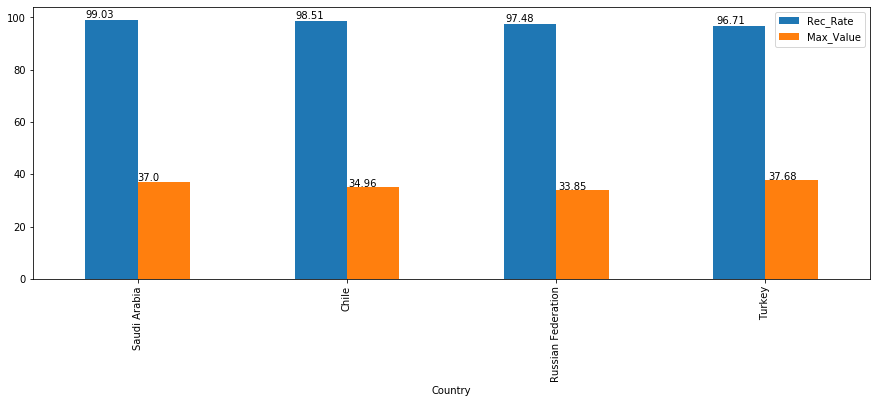

In [146]:
ax = df_filtered_top.plot(x="Country", y=["Rec_Rate", "Max_Value"], kind="bar", figsize=(15,5))
for p in ax.patches:
    ax.annotate(str(float("{:.2f}".format(p.get_height()))), (p.get_x() * 1.005, p.get_height() * 1.01))

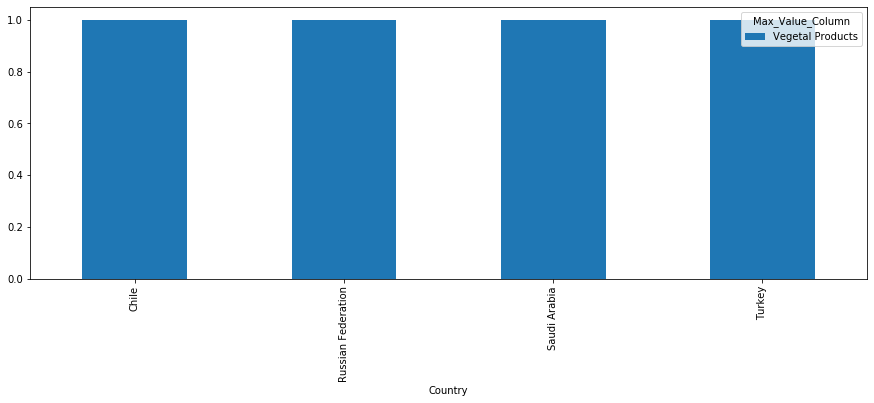

In [148]:
df_filtered_top.groupby(['Country','Max_Value_Column']).size().unstack().plot(kind='bar',stacked=True, figsize=(15,5))

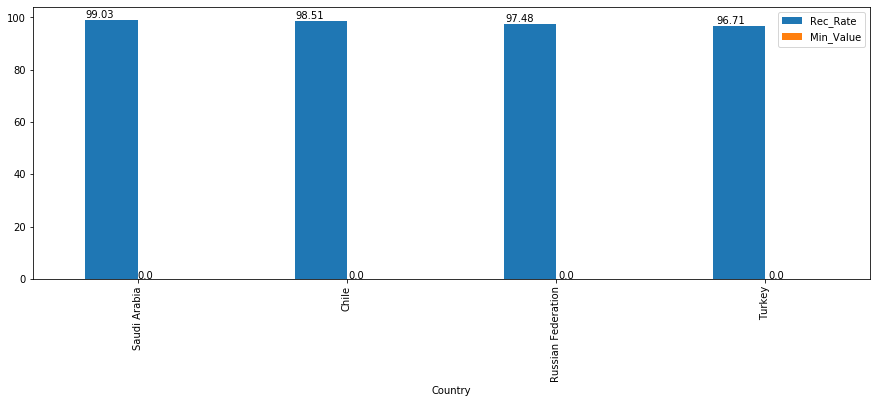

In [150]:
ax = df_filtered_top.plot(x="Country", y=["Rec_Rate", "Min_Value"], kind="bar", figsize=(15,5))
for p in ax.patches:
    ax.annotate(str(float("{:.2f}".format(p.get_height()))), (p.get_x() * 1.005, p.get_height() * 1.01))

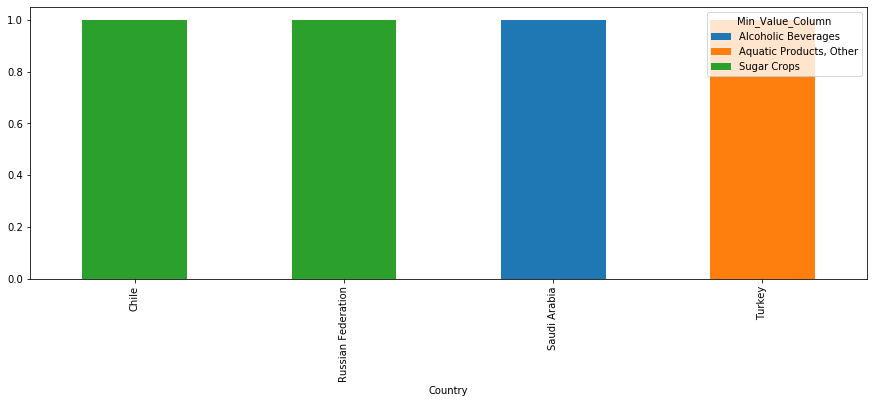

In [151]:
df_filtered_top.groupby(['Country','Min_Value_Column']).size().unstack().plot(kind='bar',stacked=True, figsize=(15,5))

In [48]:
df[['Country', 'Rec_Rate']].loc[df['Total Confirmed']>= 100000].tail(4)

,Country,Rec_Rate
74,Italy,83.028097
161,United States of America,79.948813
51,France,70.876657
159,United Kingdom,2.959583


In [49]:
df_filtered_bottom = df[df["Country"].isin(["Italy", "United States of America", "France", "United Kingdom"])]
df_filtered_bottom = df_filtered_bottom.sort_values(by=['Rec_Rate'], ascending=True)
df_filtered_bottom

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),Rec_Rate,Total Confirmed
159,United Kingdom,5.2632,0.2754,18.8798,0.0006,6.5412,0.6210,1.0911,4.9551,4.4181,...,29.5,<2.5,0.430358,0.060786,0.001854,0.367718,66833000.0,%,2.959583,287621.0
51,France,4.1631,0.7907,21.7097,0.0011,6.9951,0.6110,1.8214,4.8780,4.4005,...,23.2,<2.5,0.294756,0.044973,0.109450,0.140332,64834000.0,%,70.876657,191102.0
161,United States of America,4.8647,0.1681,21.2352,0.0020,5.5048,0.7860,1.1287,4.5432,6.2645,...,37.3,<2.5,0.590109,0.033575,0.153839,0.397687,329153000.0,%,79.948813,1942363.0
74,Italy,3.1892,0.2834,19.0329,0.0005,8.5417,0.6247,1.5816,6.0207,4.2963,...,22.9,<2.5,0.389424,0.056175,0.274815,0.058434,60345000.0,%,83.028097,234998.0


In [50]:
df_filtered_bottom_food = df_filtered_bottom.iloc[:,1:24]
df_filtered_bottom_food.sum(axis = 1, skipna = True) 

159     99.9998
51     100.0000
161    100.0000
74      99.9998
dtype: float64

In [149]:
df_filtered_bottom['Max_Value'] = df_filtered_bottom_food.max(axis=1)

df_filtered_bottom['Max_Value']

159    31.1116
51     28.2903
161    28.7587
74     30.9671
Name: Max_Value, dtype: float64

In [52]:
df_filtered_bottom['Max_Value_Column'] = df_filtered_bottom_food.idxmax(axis=1)
 
df_filtered_bottom['Max_Value_Column']

159    Vegetal Products
51     Vegetal Products
161    Vegetal Products
74     Vegetal Products
Name: Max_Value_Column, dtype: object

In [53]:
df_filtered_bottom['Min_Value'] = df_filtered_bottom_food.min(axis=1)

df_filtered_bottom['Min_Value']

159    0.0
51     0.0
161    0.0
74     0.0
Name: Min_Value, dtype: float64

In [54]:
df_filtered_bottom['Min_Value_Column'] = df_filtered_bottom_food.idxmin(axis=1)
 
df_filtered_bottom['Min_Value_Column']

159      Sugar Crops
51       Sugar Crops
161    Miscellaneous
74       Sugar Crops
Name: Min_Value_Column, dtype: object

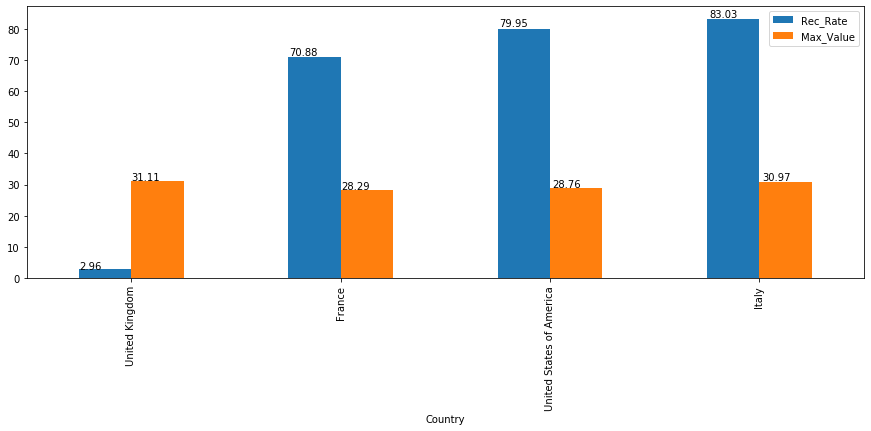

In [144]:
ax = df_filtered_bottom.plot(x="Country", y=["Rec_Rate", "Max_Value"], kind="bar", figsize=(15,5))
for p in ax.patches:
    ax.annotate(str(float("{:.2f}".format(p.get_height()))), (p.get_x() * 1.005, p.get_height() * 1.01))

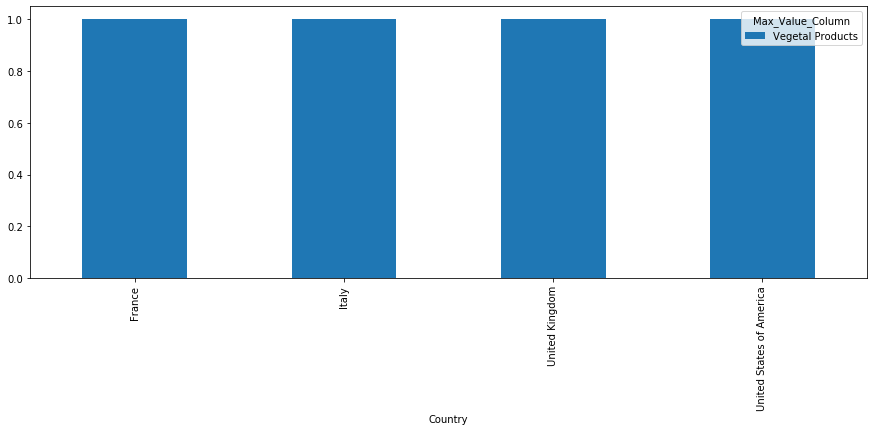

In [145]:
df_filtered_bottom.groupby(['Country','Max_Value_Column']).size().unstack().plot(kind='bar',stacked=True, figsize=(15,5))

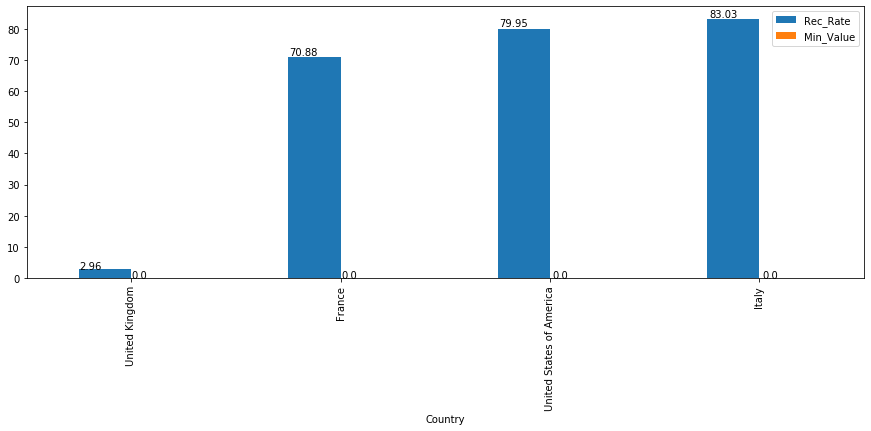

In [152]:
ax = df_filtered_bottom.plot(x="Country", y=["Rec_Rate", "Min_Value"], kind="bar", figsize=(15,5))
for p in ax.patches:
    ax.annotate(str(float("{:.2f}".format(p.get_height()))), (p.get_x() * 1.005, p.get_height() * 1.01))

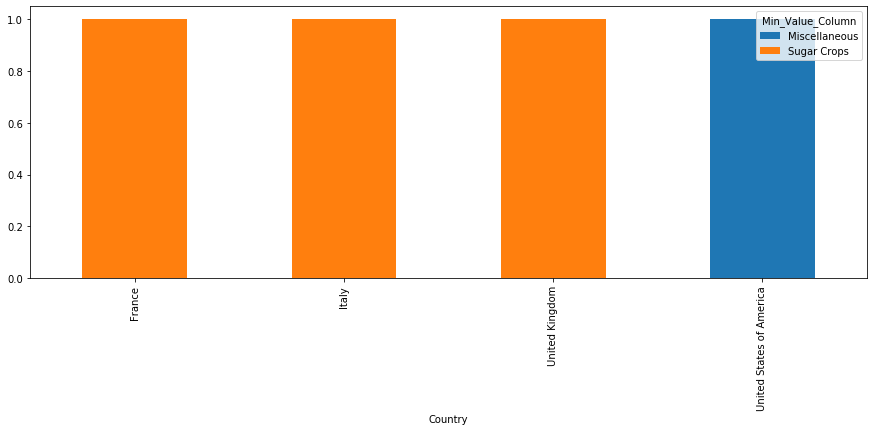

In [153]:
df_filtered_bottom.groupby(['Country','Min_Value_Column']).size().unstack().plot(kind='bar',stacked=True, figsize=(15,5))

In [74]:
top_countries = df[['Country', 'Rec_Rate']].loc[df['Total Confirmed']>= 50000].head(10)
top_countries

,Country,Rec_Rate
133,Saudi Arabia,99.031675
29,Chile,98.508931
126,Russian Federation,97.479354
154,Turkey,96.711084
56,Germany,95.118291
68,India,94.500782
30,China,94.483300
117,Pakistan,94.355316
70,Iran (Islamic Republic of),94.194069
120,Peru,94.039309


In [75]:
bottom_countries = df[['Country', 'Rec_Rate']].loc[df['Total Confirmed']>= 50000].tail(10)
bottom_countries

,Country,Rec_Rate
11,Bangladesh,93.996349
20,Brazil,88.622284
26,Canada,87.407277
100,Mexico,85.945996
141,Spain,84.713146
74,Italy,83.028097
161,United States of America,79.948813
51,France,70.876657
14,Belgium,62.933632
159,United Kingdom,2.959583


In [76]:
top_bottom_countries = pd.concat([top_countries, bottom_countries], axis=0)
top_bottom_countries

,Country,Rec_Rate
133,Saudi Arabia,99.031675
29,Chile,98.508931
126,Russian Federation,97.479354
154,Turkey,96.711084
56,Germany,95.118291
68,India,94.500782
30,China,94.483300
117,Pakistan,94.355316
70,Iran (Islamic Republic of),94.194069
120,Peru,94.039309


In [79]:
df_filtered_10 = df[df["Country"].isin(top_bottom_countries["Country"])]
df_filtered_10 = df_filtered_10.sort_values(by=['Rec_Rate'], ascending=False)
df_filtered_10

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),Rec_Rate,Total Confirmed
133,Saudi Arabia,0.0000,0.3917,12.9962,0.0000,16.3284,0.6003,1.0369,7.0413,4.9529,...,35.0,7.1,0.297837,0.002081,0.212803,0.082953,3.421800e+07,%,99.031675,101914.0
29,Chile,4.9690,0.1782,15.0394,0.0155,10.8579,0.7757,0.8711,3.9109,6.1492,...,28.8,2.7,0.702099,0.008568,0.566023,0.127508,1.910700e+07,%,98.508931,134150.0
126,Russian Federation,3.7425,0.2486,16.1525,0.0023,8.2803,0.9029,1.1312,3.1620,4.3180,...,25.7,<2.5,0.318319,0.003988,0.154209,0.160123,1.467310e+08,%,97.479354,467073.0
154,Turkey,0.6474,0.1459,12.3156,0.0000,9.7080,0.3956,0.2582,6.8321,2.0694,...,32.2,<2.5,0.205953,0.005680,0.167019,0.033255,8.260700e+07,%,96.711084,170132.0
56,Germany,6.7714,0.6715,20.8485,0.0011,6.0363,0.5947,0.6758,3.6131,4.6524,...,25.7,<2.5,0.223526,0.010451,0.203639,0.009436,8.310000e+07,%,95.118291,185750.0
68,India,0.1959,0.0028,11.3357,0.0000,17.3821,0.3061,0.6499,5.4333,0.3560,...,3.8,14.5,0.018499,0.000518,0.008898,0.009083,1.391885e+09,%,94.500782,257486.0
30,China,2.3224,0.0866,13.4240,0.0542,8.9298,1.2059,3.3435,4.2451,6.0732,...,6.6,8.5,0.006022,0.000332,0.005682,0.000009,1.398030e+09,%,94.483300,84191.0
117,Pakistan,0.0085,0.0969,22.2758,0.0011,14.6224,0.3577,0.1831,2.4099,1.7957,...,7.8,20.3,0.045687,0.000924,0.015453,0.029310,2.165650e+08,%,94.355316,98943.0
70,Iran (Islamic Republic of),0.0007,0.5369,7.9295,0.0020,14.0141,0.4916,0.7813,7.9235,2.3965,...,25.5,4.9,0.204728,0.009869,0.160109,0.034750,8.391100e+07,%,94.194069,171789.0
120,Peru,3.8623,0.0316,8.6638,0.0014,11.8140,0.6431,1.7993,8.5783,1.7540,...,19.1,9.7,0.618341,0.017196,0.271291,0.329854,3.178100e+07,%,94.039309,196515.0


In [80]:
df_filtered_10_food = df_filtered_10.iloc[:,1:24]
df_filtered_10_food.sum(axis = 1, skipna = True) 

133    100.0001
29     100.0001
126     99.9999
154    100.0001
56     100.0000
68      99.9999
30      99.9998
117    100.0001
70     100.0000
120    100.0000
11      99.9999
20      99.9999
26      99.9999
100     99.9995
141    100.0001
74      99.9998
161    100.0000
51     100.0000
14     100.0001
159     99.9998
dtype: float64

In [81]:
df_filtered_10['Max_Value'] = df_filtered_10_food.max(axis=1)

df_filtered_10['Max_Value']

133    37.0038
29     34.9584
126    33.8472
154    37.6836
56     29.1443
68     38.6568
30     36.5744
117    27.7226
70     42.0701
120    41.3344
11     44.8033
20     32.6537
26     33.9551
100    34.8456
141    31.6581
74     30.9671
161    28.7587
51     28.2903
14     32.2637
159    31.1116
Name: Max_Value, dtype: float64

In [82]:
df_filtered_10['Max_Value_Column'] = df_filtered_10_food.idxmax(axis=1)
 
df_filtered_10['Max_Value_Column']

133    Vegetal Products
29     Vegetal Products
126    Vegetal Products
154    Vegetal Products
56     Vegetal Products
68     Vegetal Products
30     Vegetal Products
117    Vegetal Products
70     Vegetal Products
120    Vegetal Products
11     Vegetal Products
20     Vegetal Products
26     Vegetal Products
100    Vegetal Products
141    Vegetal Products
74     Vegetal Products
161    Vegetal Products
51     Vegetal Products
14     Vegetal Products
159    Vegetal Products
Name: Max_Value_Column, dtype: object

In [83]:
df_filtered_10['Min_Value'] = df_filtered_10_food.min(axis=1)

df_filtered_10['Min_Value']

133    0.0000
29     0.0000
126    0.0000
154    0.0000
56     0.0000
68     0.0000
30     0.0253
117    0.0011
70     0.0000
120    0.0000
11     0.0000
20     0.0000
26     0.0000
100    0.0000
141    0.0000
74     0.0000
161    0.0000
51     0.0000
14     0.0000
159    0.0000
Name: Min_Value, dtype: float64

In [84]:
df_filtered_10['Min_Value_Column'] = df_filtered_10_food.idxmin(axis=1)
 
df_filtered_10['Min_Value_Column']

133        Alcoholic Beverages
29                 Sugar Crops
126                Sugar Crops
154    Aquatic Products, Other
56               Miscellaneous
68     Aquatic Products, Other
30                 Sugar Crops
117    Aquatic Products, Other
70                 Sugar Crops
120                Sugar Crops
11     Aquatic Products, Other
20     Aquatic Products, Other
26                 Sugar Crops
100                Sugar Crops
141              Miscellaneous
74                 Sugar Crops
161              Miscellaneous
51                 Sugar Crops
14               Miscellaneous
159                Sugar Crops
Name: Min_Value_Column, dtype: object

In [117]:
df_filtered_10['Rec_Rate'] = df_filtered_10['Rec_Rate'].astype(float)
df_filtered_10['Max_Value'] = df_filtered_10['Max_Value'].astype(float)
df_filtered_10['Min_Value'] = df_filtered_10['Min_Value'].astype(float)


df_filtered_10

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Recovered,Active,Population,Unit (all except Population),Rec_Rate,Total Confirmed,Max_Value,Max_Value_Column,Min_Value,Min_Value_Column
133,Saudi Arabia,0.0000,0.3917,12.9962,0.0000,16.3284,0.6003,1.0369,7.0413,4.9529,...,0.212803,0.082953,3.421800e+07,%,99.031675,101914.0,37.0038,Vegetal Products,0.0000,Alcoholic Beverages
29,Chile,4.9690,0.1782,15.0394,0.0155,10.8579,0.7757,0.8711,3.9109,6.1492,...,0.566023,0.127508,1.910700e+07,%,98.508931,134150.0,34.9584,Vegetal Products,0.0000,Sugar Crops
126,Russian Federation,3.7425,0.2486,16.1525,0.0023,8.2803,0.9029,1.1312,3.1620,4.3180,...,0.154209,0.160123,1.467310e+08,%,97.479354,467073.0,33.8472,Vegetal Products,0.0000,Sugar Crops
154,Turkey,0.6474,0.1459,12.3156,0.0000,9.7080,0.3956,0.2582,6.8321,2.0694,...,0.167019,0.033255,8.260700e+07,%,96.711084,170132.0,37.6836,Vegetal Products,0.0000,"Aquatic Products, Other"
56,Germany,6.7714,0.6715,20.8485,0.0011,6.0363,0.5947,0.6758,3.6131,4.6524,...,0.203639,0.009436,8.310000e+07,%,95.118291,185750.0,29.1443,Vegetal Products,0.0000,Miscellaneous
68,India,0.1959,0.0028,11.3357,0.0000,17.3821,0.3061,0.6499,5.4333,0.3560,...,0.008898,0.009083,1.391885e+09,%,94.500782,257486.0,38.6568,Vegetal Products,0.0000,"Aquatic Products, Other"
30,China,2.3224,0.0866,13.4240,0.0542,8.9298,1.2059,3.3435,4.2451,6.0732,...,0.005682,0.000009,1.398030e+09,%,94.483300,84191.0,36.5744,Vegetal Products,0.0253,Sugar Crops
117,Pakistan,0.0085,0.0969,22.2758,0.0011,14.6224,0.3577,0.1831,2.4099,1.7957,...,0.015453,0.029310,2.165650e+08,%,94.355316,98943.0,27.7226,Vegetal Products,0.0011,"Aquatic Products, Other"
70,Iran (Islamic Republic of),0.0007,0.5369,7.9295,0.0020,14.0141,0.4916,0.7813,7.9235,2.3965,...,0.160109,0.034750,8.391100e+07,%,94.194069,171789.0,42.0701,Vegetal Products,0.0000,Sugar Crops
120,Peru,3.8623,0.0316,8.6638,0.0014,11.8140,0.6431,1.7993,8.5783,1.7540,...,0.271291,0.329854,3.178100e+07,%,94.039309,196515.0,41.3344,Vegetal Products,0.0000,Sugar Crops


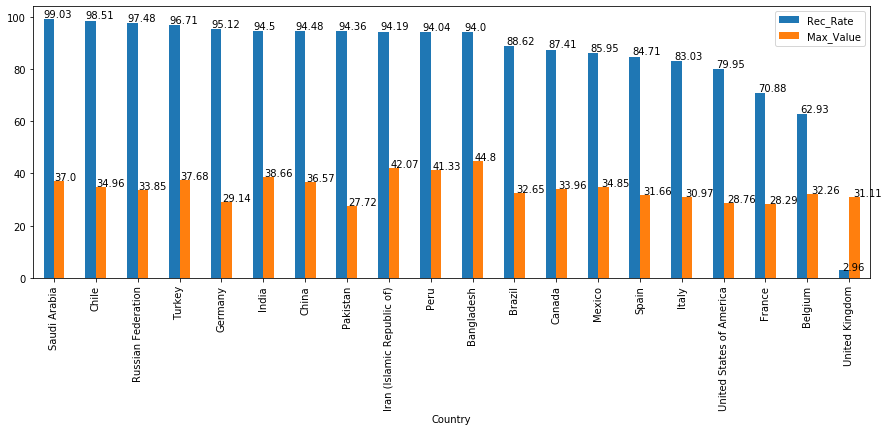

In [136]:
ax = df_filtered_10.plot(x="Country", y=["Rec_Rate", "Max_Value"], kind="bar", figsize=(15,5))
for p in ax.patches:
    ax.annotate(str(float("{:.2f}".format(p.get_height()))), (p.get_x() * 1.005, p.get_height() * 1.01))

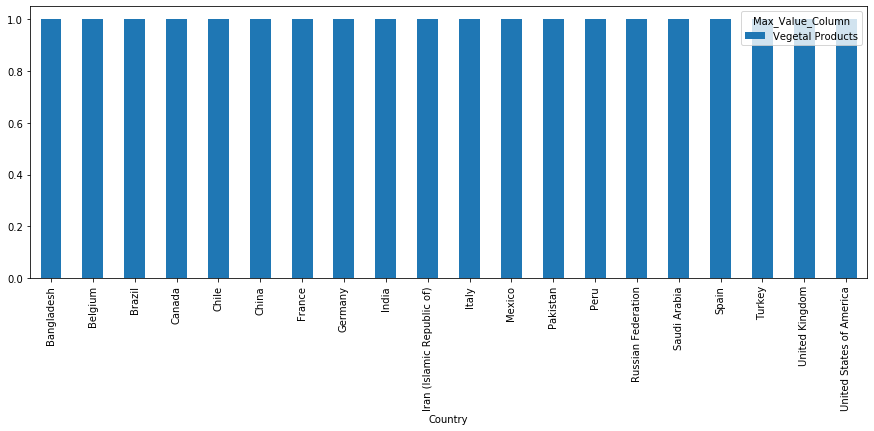

In [142]:
df_filtered_10.groupby(['Country','Max_Value_Column']).size().unstack().plot(kind='bar',stacked=True, figsize=(15,5))

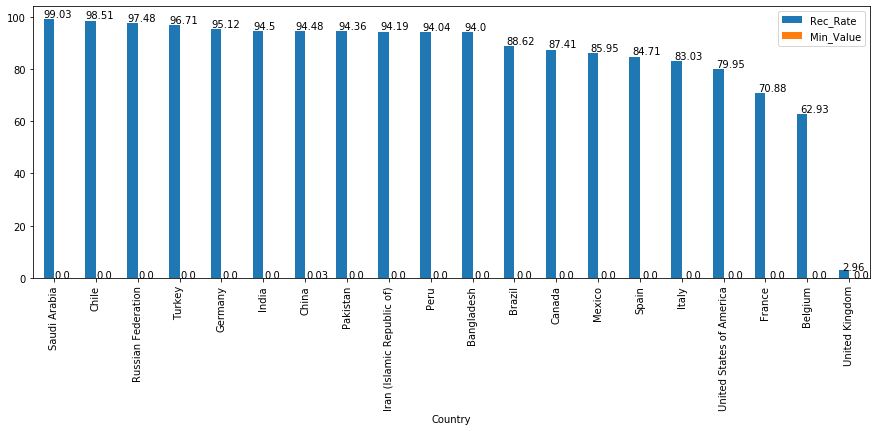

In [138]:
ax2 = df_filtered_10.plot(x="Country", y=["Rec_Rate", "Min_Value"], kind="bar", figsize=(15,5))
for p in ax2.patches:
    ax2.annotate(str(float("{:.2f}".format(p.get_height()))), (p.get_x() * 1.005, p.get_height() * 1.01))

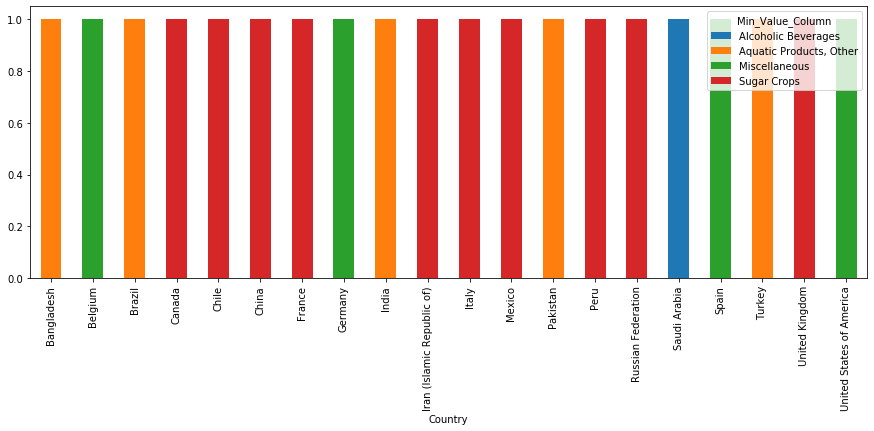

In [143]:
df_filtered_10.groupby(['Country','Min_Value_Column']).size().unstack().plot(kind='bar',stacked=True, figsize=(15,5))

In [ ]:

# create data
df_kg_Russia_column_names=list(df_kg_Russia)[1:24]
df_kg_Russia_percentages=df_kg_Russia.iloc[:,1:24]
df_kg_Russia_percentages = df_kg_Russia_percentages.values.tolist()

